In [1]:
import pandas as pd
def read_random_row_pandas(filename):
    df = pd.read_csv(filename)
    random_row = df.sample()
    return random_row.values[0]
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'

/home/edabk/anaconda3/envs/Sleep/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


7.0
(32,)


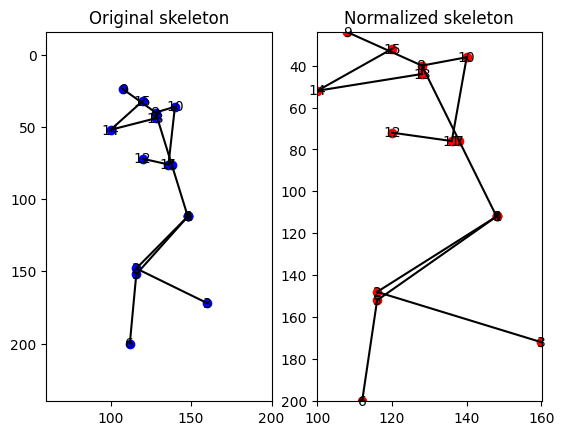

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import torch
def plot_line(a, b):
    if (a.any()> 0 and b.any()>0): plt.plot([a[0], b[0]], [a[1], b[1]], 'k-')

def plot_skeleton(sample, pattern):
    for i in range(len(sample)//2):
        plt.plot(sample[i*2], sample[i*2+1], pattern)
    skeleton = sample.reshape(1, 32)
    Nose = skeleton[:,9*2:9*2+2][0]
    Neck = skeleton[:,8*2:8*2+2][0]
    Spine = skeleton[:,7*2:7*2+2][0]
    Bottom = skeleton[:,0*2:0*2+2][0]
    RShoulder = skeleton[:,10*2:10*2+2][0]
    RElbow = skeleton[:,11*2:11*2+2][0]
    RWrist = skeleton[:,12*2:12*2+2][0]
    LShoulder = skeleton[:,13*2:13*2+2][0]
    LElbow = skeleton[:,14*2:14*2+2][0]
    LWrist = skeleton[:,15*2:15*2+2][0]
    RHip = skeleton[:,4*2:4*2+2][0]
    RKnee = skeleton[:,5*2:5*2+2][0]
    RAnkle = skeleton[:,6*2:6*2+2][0]
    LHip = skeleton[:,1*2:1*2+2][0]
    LKnee = skeleton[:,2*2:2*2+2][0]
    LAnkle = skeleton[:,3*2:3*2+2][0]
    REye = skeleton[:,9*2:9*2+2][0]
    LEye = skeleton[:,9*2:9*2+2][0]
    REar = skeleton[:,9*2:9*2+2][0]
    LEar = skeleton[:,9*2:9*2+2][0]

    x_coordinates=skeleton[:,0::2][0]
    y_coordinates=skeleton[:,1::2][0]
    #Annotate each point with its index along the last dimension of the tensor
    for i, (x, y) in enumerate(zip(x_coordinates, y_coordinates)):
        plt.text(x, y, str(i), fontsize=10, ha='center', va='center')
    plot_line(Neck,Spine)
    plot_line(Spine,Bottom)
    plot_line(Bottom,LHip)
    plot_line(Bottom,RHip)
    plot_line(LEar, LEye)
    plot_line(LEye, Nose)
    plot_line(REar, REye)
    plot_line(REye, Nose)
    plot_line(Nose, Neck)
    plot_line(Neck, LShoulder)
    plot_line(LShoulder, LElbow)
    plot_line(LElbow, LWrist)
    plot_line(Neck, RShoulder)
    plot_line(RShoulder, RElbow)
    plot_line(RElbow, RWrist)
    plot_line(LHip, LKnee)
    plot_line(LKnee, LAnkle)
    plot_line(RHip, RKnee)
    plot_line(RKnee, RAnkle)


def transform_tensor(input_tensor):
    """Processes a PyTorch tensor for specific shape transformations.

    Args:
        input_tensor: The input PyTorch tensor.

    Returns:
        A NumPy array with the final shape (32,).
    """

    # Detach from CUDA if necessary
    if input_tensor.is_cuda:
        input_tensor = input_tensor.cpu().detach()

    # Assert expected input shape
    assert (input_tensor.shape == (1, 16, 2)  or input_tensor.shape == (16, 2)), "Input tensor must have shape (1, 16, 2) or (16, 2) "

    # Convert to NumPy array with the same shape
    numpy_array = input_tensor.numpy()

    # Reshape to (2, 16)
    numpy_array = numpy_array.reshape(2, 16)

    # Interleave coordinates to (32,)
    x_coordinates = numpy_array[0]
    y_coordinates = numpy_array[1]
    result = np.zeros(32, dtype=numpy_array.dtype)  # Ensures correct data type
    result[::2] = x_coordinates
    result[1::2] = y_coordinates

    return result 
def plot(sample,path,name): # this is for ploting 1 sample
    # e.g the real shape is: (1,32) ( 2 is x and y)  (coi nhu ta ko biet 32 di, cu coi nhu la sample.shape[1])
    # temp_sample=np.zeros((32,))
    # temp_sample[::2]=sample[0,:]
    # temp_sample[1::2]=sample[1,:]
    # sample=temp_sample

    sample = transform_tensor(sample)
    if sample.shape[0] == 32:
        sample_norm = sample.reshape(1,32)[0]
        # Plot normalized coordinates
        pad_nor = 0.2
        plt.title('Normalized skeleton')
        X_nor = sample_norm
        x_max = max(X_nor[0::2]) + pad_nor
        x_min = min(X_nor[0::2]) - pad_nor
        y_max = max(X_nor[1::2]) + pad_nor
        y_min = min(X_nor[1::2]) - pad_nor
        plt.xlim(x_min,x_max)
        plt.ylim(y_max, y_min)
        plot_skeleton(X_nor, 'ro')
        final_path=os.path.join(path,"{}.png".format(str(name)))
        plt.show()
        plt.close()
    else:
        print("sample is one-dimension array: (28,)")


df = pd.read_csv("/home/edabk/cuong/human-pose-classifier/data/kp_16_cover_modes/cover2/traincover2.csv")
random_row = df.sample()
sample=random_row.values[0]
print(sample[-1])
sample=sample[:-1]
print(sample.shape)
if sample.shape[0] == 32:
    sample_norm = sample.reshape(1,32)[0]
    # Plot original coordinates
    pad_ori = 40
    plt.figure(str(sample))
    plt.subplot(121)
    plt.title('Original skeleton')
    X_ori = sample
    x_max = max(X_ori[0::2]) + pad_ori
    x_min = min(i for i in X_ori[0::2] if i > 0) - pad_ori
    y_max = max(X_ori[1::2]) + pad_ori
    y_min = min(j for j in X_ori[1::2] if j > 0) - pad_ori
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_ori, 'bo')                                
    # Plot normalized coordinates
    pad_nor = 0.2
    #plt.figure(2)
    plt.subplot(122)
    plt.title('Normalized skeleton')
    X_nor = sample_norm
    x_max = max(X_nor[0::2]) + pad_nor
    x_min = min(X_nor[0::2]) - pad_nor
    y_max = max(X_nor[1::2]) + pad_nor
    y_min = min(X_nor[1::2]) - pad_nor
    plt.xlim(x_min,x_max)
    plt.ylim(y_max, y_min)
    plot_skeleton(X_nor, 'ro')
    plt.show()
else:
    print("sample is one-dimension array: (28,)")